In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import warnings
warnings.filterwarnings('ignore')
import nltk

In [2]:
# We need to import the Twitter file

file = pd.read_csv(r'C:\Users\rkddu\Downloads\training.1600000.processed.noemoticon.csv',encoding='latin-1', header= None, 
                   names=['target','ID','Date','Option','Option1','Tweet'])

In [3]:
file.head()

,target,ID,Date,Option,Option1,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
file.isnull().sum()

target     0
ID         0
Date       0
Option     0
Option1    0
Tweet      0
dtype: int64

In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   target   1600000 non-null  int64 
 1   ID       1600000 non-null  int64 
 2   Date     1600000 non-null  object
 3   Option   1600000 non-null  object
 4   Option1  1600000 non-null  object
 5   Tweet    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
file_df = file.drop(['ID','Date','Option','Option1'], axis =1)

In [7]:
file_df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of          target  Tweet
0         False  False
1         False  False
2         False  False
3         False  False
4         False  False
...         ...    ...
1599995   False  False
1599996   False  False
1599997   False  False
1599998   False  False
1599999   False  False

[1600000 rows x 2 columns]>

In [8]:
file_df['target'].unique()

array([0, 4], dtype=int64)

In [9]:
#As only 2 categorical values exists, replacing 4 by 1

In [10]:
file_df['target'] = file_df['target'].replace(4,1)

In [11]:
file_df['target'].unique()

array([0, 1], dtype=int64)

In [12]:
file_df.shape

(1600000, 2)

In [13]:
x = file_df['Tweet']
y = file_df['target']

# Preprocesing the data

In [14]:
# remove pattern in the Tweet
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern,input_txt)
    
    for i in r:
        input_txt = re.sub(i,"",input_txt)
    return input_txt

In [15]:
file_df.head()

,target,Tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [16]:
# remove the handlers(@)
file_df['clean_tweet'] = np.vectorize(remove_pattern)(file_df['Tweet'],"@[\w]*")

In [17]:
file_df.head()

,target,Tweet,clean_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - Awww, that's a bum..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."


In [18]:
file_df['clean_tweet'].head()

0     http://twitpic.com/2y1zl - Awww, that's a bum...
1    is upset that he can't update his Facebook by ...
2     I dived many times for the ball. Managed to s...
3      my whole body feels itchy and like its on fire 
4     no, it's not behaving at all. i'm mad. why am...
Name: clean_tweet, dtype: object

# Removing http from the comments: 

In [19]:
def remove_usernames_links(tweet):
    tweet = re.sub('http[^\s]+','',tweet)
    return tweet
file_df['Clean_tweet1'] = file_df['clean_tweet'].apply(remove_usernames_links)

In [20]:
file_df.head()

,target,Tweet,clean_tweet,Clean_tweet1
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - Awww, that's a bum...","- Awww, that's a bummer. You shoulda got Da..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...,I dived many times for the ball. Managed to s...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am...","no, it's not behaving at all. i'm mad. why am..."


In [21]:
#Converting the tweets into smaller case

file_df['Clean_tweet1'] = file_df['Clean_tweet1'].str.lower()

In [22]:
#Remove Stopwords

from nltk.corpus import stopwords

In [23]:
stop_list = stopwords.words('english')
stop_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
# Write a user defined function to remove the stopwords

def sw(x):
    x =[word_list for word_list in x.split() if word_list not in stop_list]
    return " ".join(x)

In [25]:
file_df['Clean_tweet1'] = file_df['Clean_tweet1'].apply(sw)

In [26]:
file_df['Clean_tweet1'].head()

0    - awww, that's bummer. shoulda got david carr ...
1    upset can't update facebook texting it... migh...
2    dived many times ball. managed save 50% rest g...
3                     whole body feels itchy like fire
4    no, behaving all. i'm mad. here? can't see there.
Name: Clean_tweet1, dtype: object

# Remove Special Characters, numbers and punctuation

In [27]:
file_df['Final_tweet'] = file_df['Clean_tweet1'].str.replace("[^a-zA-Z# ]"," ")
file_df.head()

,target,Tweet,clean_tweet,Clean_tweet1,Final_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - Awww, that's a bum...","- awww, that's bummer. shoulda got david carr ...",awww that s bummer shoulda got david carr ...
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...,upset can't update facebook texting it... migh...,upset can t update facebook texting it migh...
2,0,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...,dived many times ball. managed save 50% rest g...,dived many times ball managed save rest g...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am...","no, behaving all. i'm mad. here? can't see there.",no behaving all i m mad here can t see there


In [28]:
# remove shot lengh of words

file_df['Final_tweet'] = file_df['Final_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
file_df.head()

,target,Tweet,clean_tweet,Clean_tweet1,Final_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - Awww, that's a bum...","- awww, that's bummer. shoulda got david carr ...",awww that bummer shoulda david carr third
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...,upset can't update facebook texting it... migh...,upset update facebook texting might result sch...
2,0,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...,dived many times ball. managed save 50% rest g...,dived many times ball managed save rest bounds
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am...","no, behaving all. i'm mad. here? can't see there.",behaving here there


In [29]:
#Tokenize the tweet- individual words considered as a single token

tokenize_tweet = file_df['Final_tweet'].apply(lambda x: x.split())
tokenize_tweet.head()

0    [awww, that, bummer, shoulda, david, carr, third]
1    [upset, update, facebook, texting, might, resu...
2    [dived, many, times, ball, managed, save, rest...
3              [whole, body, feels, itchy, like, fire]
4                              [behaving, here, there]
Name: Final_tweet, dtype: object

In [30]:
# Stem the words- bring down to the root word.

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenize_tweet = tokenize_tweet.apply(lambda x : [stemmer.stem(i) for i in x])
tokenize_tweet.head()

0    [awww, that, bummer, shoulda, david, carr, third]
1    [upset, updat, facebook, text, might, result, ...
2    [dive, mani, time, ball, manag, save, rest, bo...
3               [whole, bodi, feel, itchi, like, fire]
4                                 [behav, here, there]
Name: Final_tweet, dtype: object

In [31]:
# Now combine the stemmed words into a single sentence

for i in range(len(tokenize_tweet)):
    
    tokenize_tweet[i] = " ".join(tokenize_tweet[i])
    
file_df['Final_tweet'] = tokenize_tweet

file_df['Final_tweet'].head()

0            awww that bummer shoulda david carr third
1    upset updat facebook text might result school ...
2            dive mani time ball manag save rest bound
3                      whole bodi feel itchi like fire
4                                     behav here there
Name: Final_tweet, dtype: object

# Exploratory Data Analysis

In [32]:
#!pip install wordcloud

In [33]:
# Visualize the frequent words

all_words = " ".join([i for i in file_df['Final_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size= 100).generate(all_words)

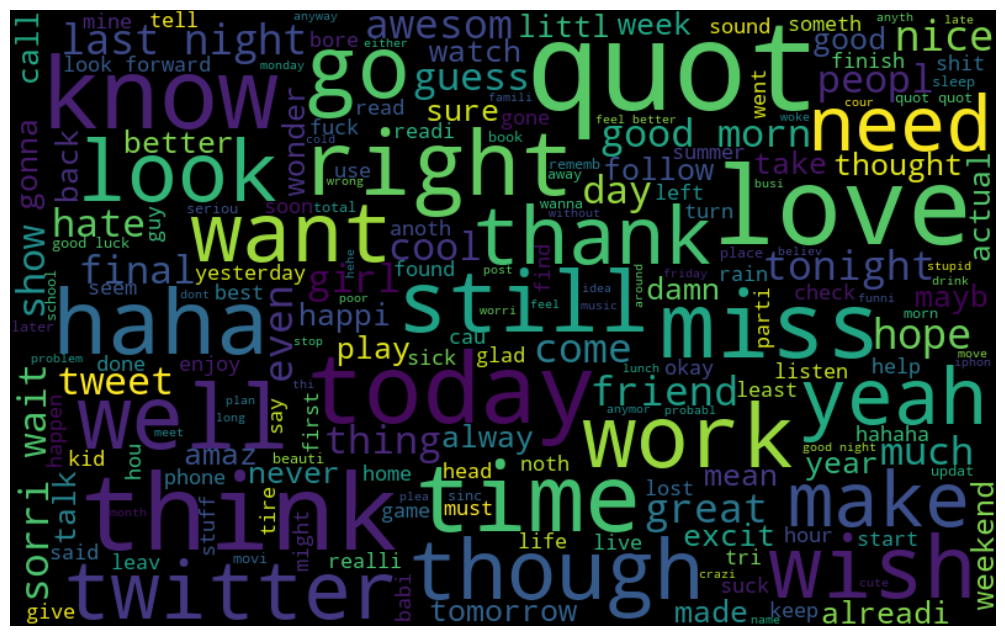

In [34]:
# Plot the graph

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
#Bigger the word more occurance of the word happens in the comments

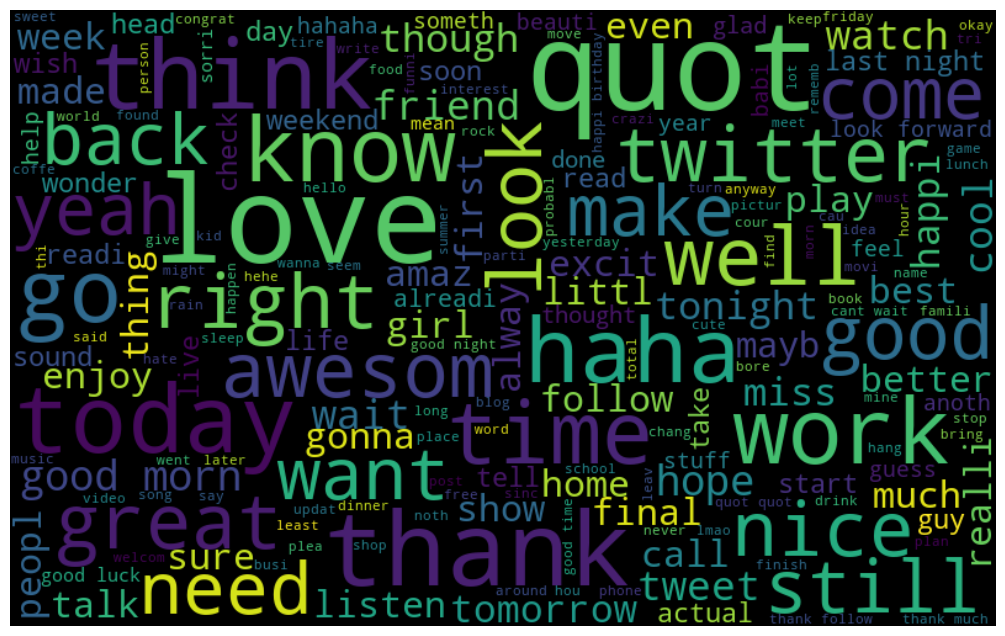

In [37]:
# Frequent words vizualisation for +ive words

all_words = " ".join([i for i in file_df['Final_tweet'][file_df['target']==1]])

wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size= 100).generate(all_words)



plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

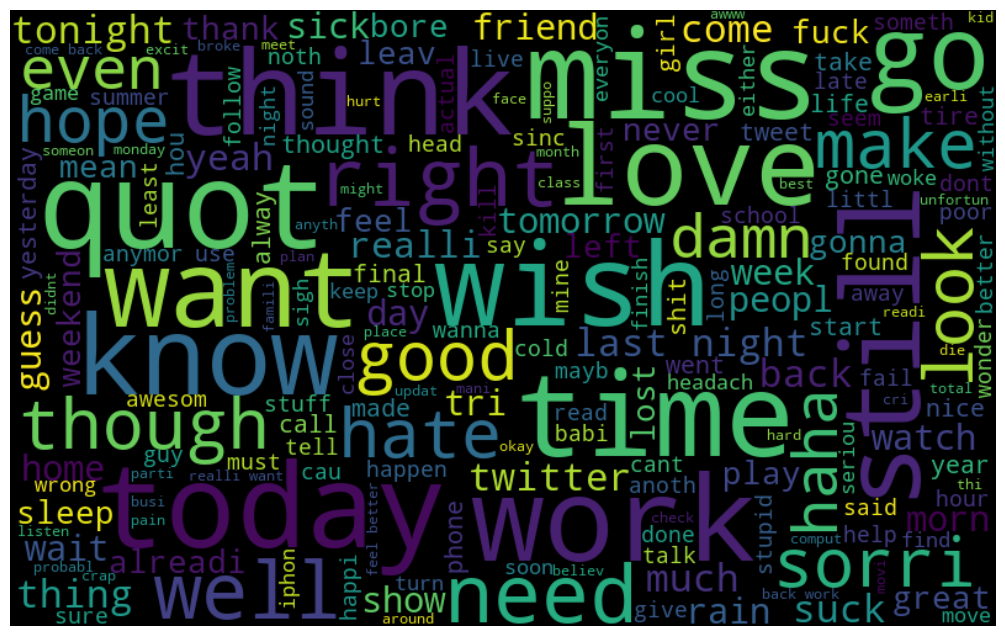

In [38]:
# Frequent words vizualisation for -ive words

all_words = " ".join([i for i in file_df['Final_tweet'][file_df['target']==0]])

wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size= 100).generate(all_words)



plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
### Getting tokenization of tweet text

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rkddu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
from nltk.tokenize import word_tokenize

In [42]:
file_df['Final_tweet'] = file_df['Final_tweet'].apply(word_tokenize)
file_df['Final_tweet'].head()

0    [awww, that, bummer, shoulda, david, carr, third]
1    [upset, updat, facebook, text, might, result, ...
2    [dive, mani, time, ball, manag, save, rest, bo...
3               [whole, bodi, feel, itchi, like, fire]
4                                 [behav, here, there]
Name: Final_tweet, dtype: object

In [43]:
df = file_df[['target','Final_tweet']]
df.head()

,target,Final_tweet
0,0,"[awww, that, bummer, shoulda, david, carr, third]"
1,0,"[upset, updat, facebook, text, might, result, ..."
2,0,"[dive, mani, time, ball, manag, save, rest, bo..."
3,0,"[whole, bodi, feel, itchi, like, fire]"
4,0,"[behav, here, there]"


# Input Split
# Feature Extraction

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y, random_state=42,test_size=0.25)

In [45]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1200000,) (400000,) (1200000,) (400000,)


In [46]:
X_train

66270                                    @nathyeah  dame!!!1
428045                @boburnham thesaurus world sale ended 
1307928    @jojoalexander ight i let they lil white boy k...
1112401    Tweetlater Pro is the way to go for those who ...
840793                       @dudendaeaseonup you are loved 
                                 ...                        
259178     this song's middle change just doesn't want to...
1414414                 @officialnjonas Good luck with that 
131932              @ProudGamerTweet I rather average 32370 
671155     Pickin up @misstinayao waitin on @sadittysash ...
121958     @ home studying for maths wooot ! im so going ...
Name: Tweet, Length: 1200000, dtype: object

In [47]:
X_test

541200                @chrishasboobs AHHH I HOPE YOUR OK!!! 
750        @misstoriblack cool , i have no tweet apps  fo...
766711     @TiannaChaos i know  just family drama. its la...
285055     School email won't open  and I have geography ...
705995                                upper airways problem 
                                 ...                        
41450      @brykins Splendid! I was told I looked like a ...
355871             @herbadmother I'm so sorry!  that IS sad 
1251663    @JosieStingray Sounds like Eddie Murphy is coo...
66109      http://twitpic.com/4incl - The tiny Porter pla...
1334209    Im glad i got my old gameboy to work,now whene...
Name: Tweet, Length: 400000, dtype: object

In [48]:
### Transforming the Dataset Using TF-IDF Vectorizer

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  500000


### Splitting into train & test

In [50]:
X_train=vectoriser.transform(X_train)
X_test=vectoriser.transform(X_test)

In [51]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [52]:
def model_eval(model):
    y_pred=model.predict(X_test)
    print('*** Classification Report ***\n\n', classification_report(Y_test,y_pred))
    
    # Confusion matrix
    c_matrix=confusion_matrix(Y_test,y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                c_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     c_matrix.flatten()/np.sum(c_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(c_matrix, annot=labels, fmt='',cmap="YlGnBu")
    
    # Plotting AUC-ROC
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE')
    plt.legend(loc="lower right")
    plt.show()

## Naive Bayes classifier

In [53]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

*** Classification Report ***

               precision    recall  f1-score   support

           0       0.80      0.79      0.80    199581
           1       0.80      0.81      0.80    200419

    accuracy                           0.80    400000
   macro avg       0.80      0.80      0.80    400000
weighted avg       0.80      0.80      0.80    400000



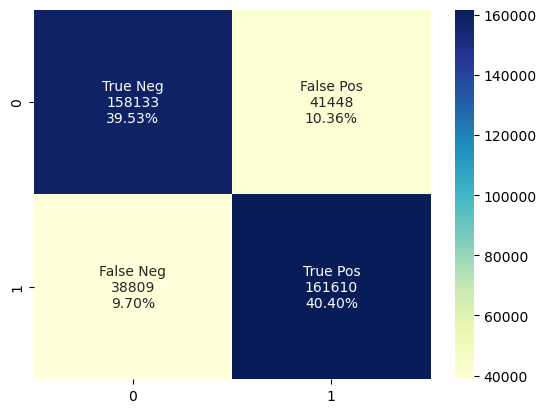

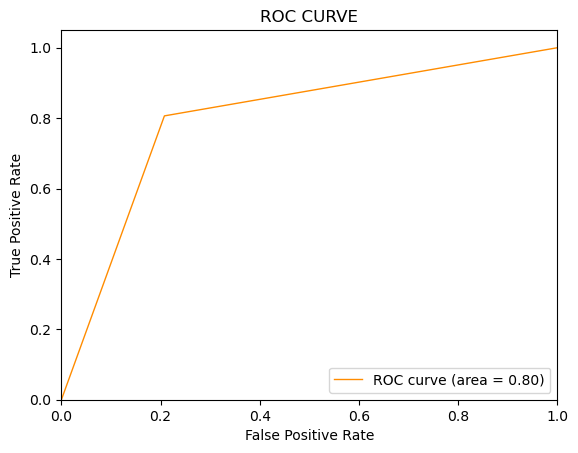

In [54]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, Y_train)
model_eval(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

In [55]:
from sklearn.linear_model import LogisticRegression

*** Classification Report ***

               precision    recall  f1-score   support

           0       0.83      0.82      0.82    199581
           1       0.82      0.83      0.83    200419

    accuracy                           0.82    400000
   macro avg       0.82      0.82      0.82    400000
weighted avg       0.82      0.82      0.82    400000



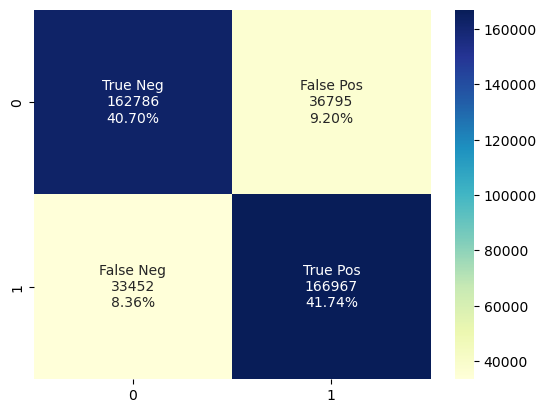

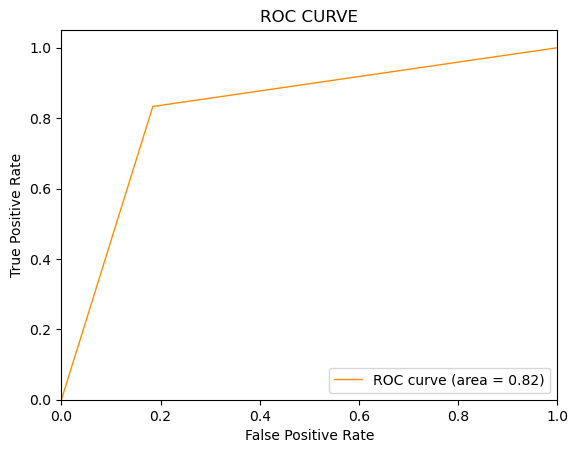

In [56]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train, Y_train)
model_eval(LRmodel)
y_pred3 = LRmodel.predict(X_test)